## 该文档作为代码的示例与补充说明

使用不同数值格式验证以下的一维波动方程：  
$$ \frac{\partial u}{\partial t}+\frac{\partial u}{\partial x} = 0 $$
初始条件为：  
$$ u(x,0) = sin(2 \pi x) $$

计算区域为0<x<3,采用周期边界条件。  

(1) 验证格式的稳定性条件，观察到发散现象；  
(2) 验证格式的精度阶数;  
(3) 观察数值解的耗散以及相位的超前和滞后。

# 问题1.1
## 验证Lax格式的稳定性条件
dx=0.01，CFL = 1 对应下列第二幅图。  

这里略过了CFL的计算，为了验证不同CFL数，我采取了同一个总时间T，不同的时间步长dt，来验证Lax格式的稳定性条件。  

In [ ]:
%matplotlib notebook

In [ ]:
from pySolvers import SolversWrapper
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc

wrapper = SolversWrapper()
LaxSolver = wrapper.createLaxSolver()


# 获取不同dt的结果
dts = [0.005,0.01, 0.03, 0.05]
dx = 0.01
results = [LaxSolver.run_and_get_data_double(dx,dt, 4) for dt in dts]

# Check the lengths of the results
print([len(res) for res in results])

# 设置绘图参数
num_dts = len(dts)
fig, axes = plt.subplots(1, num_dts, figsize=(5*num_dts, 5))  # 创建子图

def update_plot(i):
    for j, ax in enumerate(axes):
        ax.clear()
        result = results[j]
        ax.plot(np.arange(len(result[i]['u']))*dx, result[i]['u'], '-o', label='numerical')
        ax.plot(np.arange(len(result[i]['u']))*dx, result[i]['u_analy'], '-', label='analytical')
        ax.set_xlabel('x')
        ax.set_ylabel('u')
        ax.set_title('Lax Scheme with CFL={} at T = {:.3f}'.format(dts[j]/dx, result[i]['T']))
        ax.legend()
        ax.grid()

# Use the minimum number of frames among all dts
min_frames = min([len(res) for res in results])
ani = animation.FuncAnimation(fig, update_plot, frames=min_frames, interval=50)

# 显示动画
from IPython.display import HTML
HTML(ani.to_jshtml())



## 验证Lax-Wendroff格式稳定性（不同CFL数）


[500, 401, 334]


KeyboardInterrupt: 

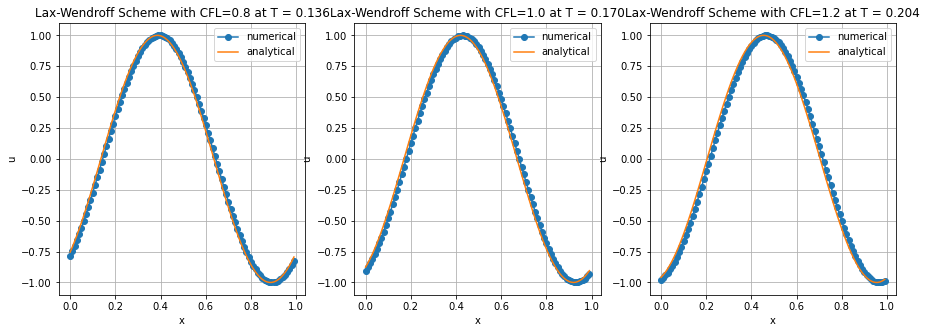

In [1]:
from pySolvers import SolversWrapper
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc

wrapper = SolversWrapper()
Lax_WendroffSolver = wrapper.createLax_WendroffSolver()


# 获取不同dt的结果
dts = [0.008,0.01, 0.012]
dx = 0.01
results = [Lax_WendroffSolver.run_and_get_data_double(dx,dt, 4) for dt in dts]

# Check the lengths of the results
print([len(res) for res in results])

# 设置绘图参数
num_dts = len(dts)
fig, axes = plt.subplots(1, num_dts, figsize=(5*num_dts, 5))  # 创建子图

def update_plot(i):
    for j, ax in enumerate(axes):
        ax.clear()
        result = results[j]
        ax.plot(np.arange(len(result[i]['u']))*dx, result[i]['u'], '-o', label='numerical')
        ax.plot(np.arange(len(result[i]['u']))*dx, result[i]['u_analy'], '-', label='analytical')
        ax.set_xlabel('x')
        ax.set_ylabel('u')
        ax.set_title('Lax-Wendroff Scheme with CFL={} at T = {:.3f}'.format(dts[j]/dx, result[i]['T']))
        ax.legend()
        ax.grid()

# Use the minimum number of frames among all dts
min_frames = min([len(res) for res in results])
ani = animation.FuncAnimation(fig, update_plot, frames=min_frames, interval=50)

# 显示动画
from IPython.display import HTML
HTML(ani.to_jshtml())


## 验证一阶迎风格式稳定性（不同CFL数）

In [ ]:
from pySolvers import SolversWrapper
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc

wrapper = SolversWrapper()
FirstOrderUpwindSolver = wrapper.createFirstOrderUpwindSolver()


# 获取不同dt的结果
dts = [0.005,0.01,0.015]
dx = 0.01
results = [FirstOrderUpwindSolver.run_and_get_data_double(dx,dt, 4) for dt in dts]

# Check the lengths of the results
print([len(res) for res in results])

# 设置绘图参数
num_dts = len(dts)
fig, axes = plt.subplots(1, num_dts, figsize=(5*num_dts, 5))  # 创建子图

def update_plot(i):
    for j, ax in enumerate(axes):
        ax.clear()
        result = results[j]
        ax.plot(np.arange(len(result[i]['u']))*dx, result[i]['u'], '-o', label='numerical')
        ax.plot(np.arange(len(result[i]['u']))*dx, result[i]['u_analy'], '-', label='analytical')
        ax.set_xlabel('x')
        ax.set_ylabel('u')
        ax.set_title('FirstOrderUpwind Scheme with CFL={} at T = {:.3f}'.format(dts[j]/dx, result[i]['T']))
        ax.legend()
        ax.grid()

# Use the minimum number of frames among all dts
min_frames = min([len(res) for res in results])
ani = animation.FuncAnimation(fig, update_plot, frames=min_frames, interval=50)

# 显示动画
from IPython.display import HTML
HTML(ani.to_jshtml())


## 1.2 验证数值格式精度
在这单元里会验证各格式精度，保证CFL<1时，固定dt，测定误差随着dx变化的规律

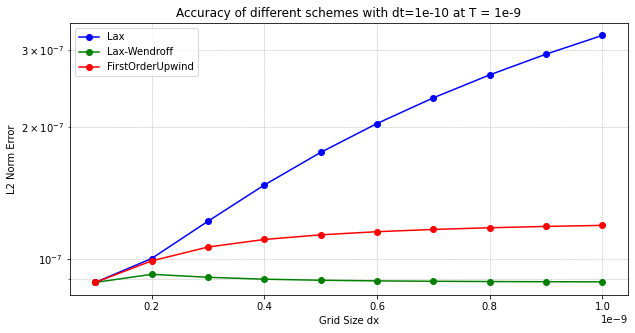

In [6]:
## 保证CFL<1,固定dt=0.01,改变dx，观察误差随dx的变化

from pySolvers import SolversWrapper
import numpy as np
import matplotlib.pyplot as plt


wrapper = SolversWrapper()
LaxSolver = wrapper.createLaxSolver()
Lax_WendroffSolver = wrapper.createLax_WendroffSolver()
FirstOrderUpwindSolver = wrapper.createFirstOrderUpwindSolver()

# 获取不同dx的结果
dt = 1e-10
dxs = 1e-10*np.array([1,2,3,4,5,6,7,8,9,10])
schemes = [LaxSolver,Lax_WendroffSolver,FirstOrderUpwindSolver]

# get the data at Time = 2

results_diffschemes = [[scheme.run_and_get_data_double(dx,dt,1e-9) for dx in dxs] for scheme in schemes]
errors_schemes = [[np.linalg.norm(result[1]['u']-result[1]['u_analy'],2) for result in results] for results in results_diffschemes]

plt.figure(figsize=(10, 5))

# 使用对数坐标
plt.yscale('log')

# 绘制结果
plt.plot(dxs, errors_schemes[0], '-o', label='Lax', color='blue')
plt.plot(dxs, errors_schemes[1], '-o', label='Lax-Wendroff', color='green')
plt.plot(dxs, errors_schemes[2], '-o', label='FirstOrderUpwind', color='red')


plt.xlabel('Grid Size dx')
plt.ylabel('L2 Norm Error')
plt.title('Accuracy of different schemes with dt={} at T = 1e-9'.format(dt))
plt.legend(loc='best')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

## 1.2解答：
上图绘制了三种格式在不同CFL(dt/dx)下的误差情况。  
可以观测到Lax和迎风格式作为一阶格式，改变相对平衡。  
可以注意到Lax-Wendroff作为二阶格式，在模拟过程中可能存在非物理的震荡。在上图中也可以被观测到。

# 1.3 验证数值的耗散和相位的超前与滞后

## 数值耗散
为了观察数值耗散，我们选择Lax格式，取稳定条件CFL数=0.5 <1,在这个情况下，会观测到数值解随时间趋于平缓。

In [ ]:
## 为了验证数值的耗散，选择Lax 格式，CFL=0.5

from pySolvers import SolversWrapper
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc

wrapper = SolversWrapper()
Solver = wrapper.createLaxSolver()

'''
---------------------------
以下是其他两种格式的选择
---------------------------

Solver = wrapper.createLax_WendroffSolver()

Solver = wrapper.createFirstOrderUpwindSolver()
'''

# 获取不同dt的结果
dt = 0.005
dx = 0.01
result = Solver.run_and_get_data_double(dx,dt,2) 

# 设置动画参数

fig = plt.figure(figsize=(10, 5))

def update_plot(i):
    plt.clf()
    plt.plot(np.arange(len(result[i]['u']))*dx, result[i]['u'], '-o', label='numerical')
    plt.plot(np.arange(len(result[i]['u']))*dx, result[i]['u_analy'], '-', label='analytical')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Lax Scheme with CFL={} at T = {:.3f}'.format(dt/dx, result[i]['T']))
    plt.legend()
    plt.grid()

ani = animation.FuncAnimation(fig, update_plot, frames=len(result), interval=50)

# 显示动画
from IPython.display import HTML
HTML(ani.to_jshtml())


## 1.3验证相位的超前与滞后

根据蔡庆东教材，Lax-Wendroff格式在CFL=0.8时观察到超频处的超前相位。

In [ ]:
## 为了验证相位的超前与滞后，选择Lax-Wendroff格式，CFL=0.8

from pySolvers import SolversWrapper
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc

wrapper = SolversWrapper()
Solver = wrapper.createLax_WendroffSolver()


'''
---------------------------
以下是其他两种格式的选择
---------------------------

Solver = wrapper.createLaxSolver()

Solver = wrapper.createFirstOrderUpwindSolver()

'''

# 获取不同dt的结果
dt = 0.016
dx = 0.02
result = Solver.run_and_get_data_double(dx,dt,5) 

# 设置动画参数

fig = plt.figure(figsize=(10, 5))

def update_plot(i):
    plt.clf()
    plt.plot(np.arange(len(result[i]['u']))*dx, result[i]['u'], '-o', label='numerical')
    plt.plot(np.arange(len(result[i]['u']))*dx, result[i]['u_analy'], '-', label='analytical')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Lax-Wendroff Scheme with CFL={} at T = {:.3f}'.format(dt/dx, result[i]['T']))
    plt.legend()
    plt.grid()

ani = animation.FuncAnimation(fig, update_plot, frames=len(result), interval=50)

from IPython.display import HTML
HTML(ani.to_jshtml())
